In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

In [21]:
df = pd.read_csv('/home/v-tyan/tsf_ideas_real/data/retail-data-analytics/sales data-set.csv')

In [22]:
data = []

for s in set(df.Store):
    for d in set(df[df.Store == s].Dept):
        cur_df = df[(df.Store == s) & (df.Dept == d)]
        if len(cur_df) == 143:
            tmp = np.zeros((143, 2))
            for idx, (sales, holi) in enumerate(zip(cur_df.Weekly_Sales, cur_df.IsHoliday)):
                tmp[idx, 0] = sales
                if holi == True:
                    tmp[idx, 1] = 1
            data.append(tmp)
        # if s % 5 == 0 and d % 17 == 0:
        #     plt.figure(figsize=(20, 5))
        #     plt.scatter(cur_df.Date, cur_df.Weekly_Sales)
        #     # plt.xticks(list(pd.date_range('05/02/2010', '26/10/2012', freq='BM')))
        #     plt.twinx()
        #     plt.scatter(cur_df.Date, cur_df.IsHoliday, c='r')
        #     plt.show()

data = np.array(data)

In [23]:
for idx in range(data.shape[0]):
    data[idx, :, 0] = (data[idx, :, 0] - np.min(data[idx, :, 0])) / (np.max(data[idx, :, 0])- np.min(data[idx, :, 0]))

In [28]:
data.shape

(2660, 143, 2)

In [37]:
data[:, :-1, 1] = data[:, 1:, 1]

In [39]:
np.save('data', data)

In [2]:
data = np.load('data.npy')

In [3]:
data.shape

(2660, 143, 2)

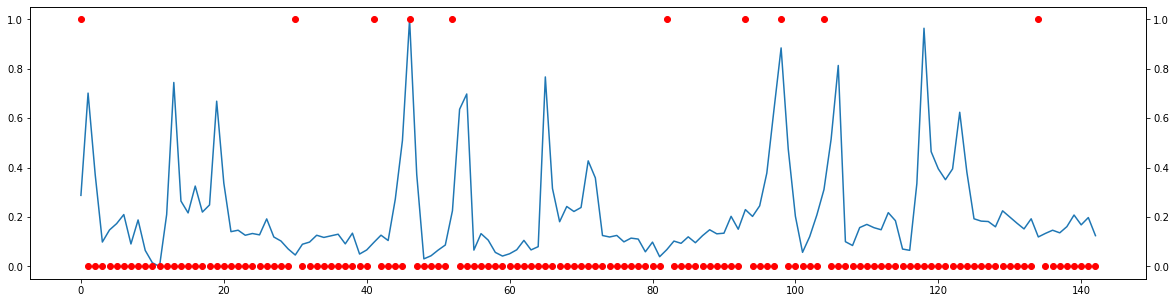

In [8]:
plt.figure(figsize=(20, 5))
plt.plot(range(data.shape[1]), data[1000, :, 0])
plt.twinx()
plt.scatter(range(data.shape[1]), data[1000, :, 1], c='r')